Imagem original carregada com sucesso!


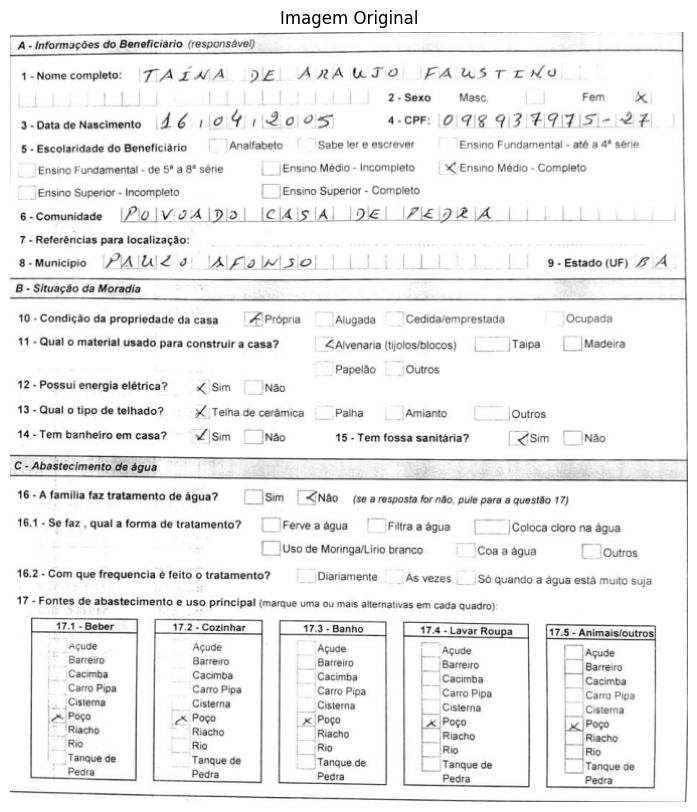

In [1]:
# Passo 1: Importando nossas ferramentas
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Linha especial para garantir que as imagens apareçam dentro do notebook
%matplotlib inline

# --- CONFIGURAÇÃO ---
# Coloque o nome exato da sua imagem de formulário de teste aqui
NOME_DO_ARQUIVO_DE_IMAGEM = 'teste.png'

# --- CARREGANDO A IMAGEM ---
# Carrega a imagem usando o OpenCV
img_original = cv2.imread(NOME_DO_ARQUIVO_DE_IMAGEM)

# Verifica se a imagem foi carregada corretamente
if img_original is None:
    print(f"ERRO: Não foi possível carregar a imagem em '{NOME_DO_ARQUIVO_DE_IMAGEM}'")
    print("Verifique se o nome do arquivo está correto e se ele está na mesma pasta que este notebook.")
else:
    print("Imagem original carregada com sucesso!")
    # Converte a cor de BGR (padrão do OpenCV) para RGB para exibição correta
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    
    # Exibe a imagem original
    plt.figure(figsize=(10, 10)) # Aumenta o tamanho da figura para melhor visualização
    plt.imshow(img_rgb)
    plt.title("Imagem Original")
    plt.axis('off') # Remove os eixos x e y
    plt.show()

Resultado com o Método de Otsu + Inversão + Erosão


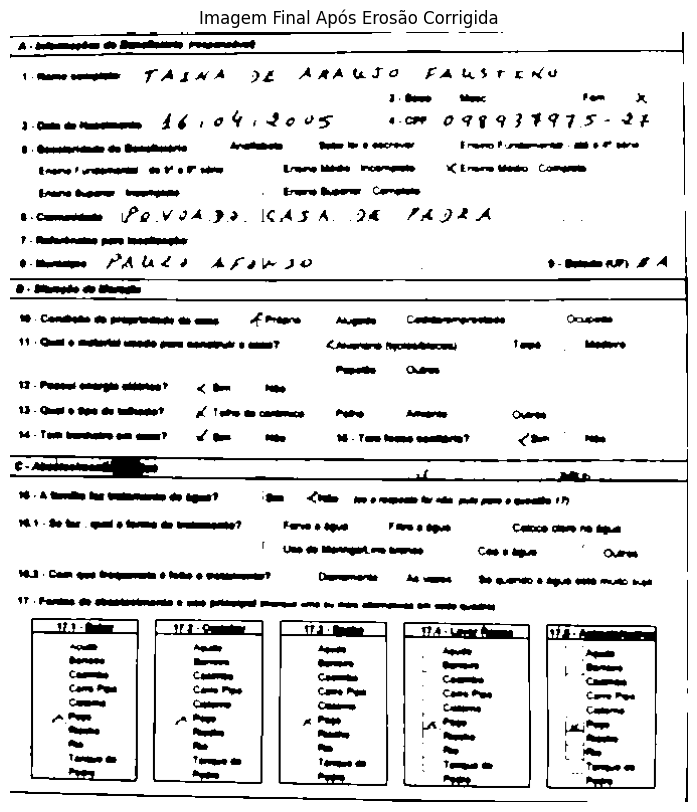

In [18]:
# --- EXPERIMENTO 8: Corrigindo a Lógica com Inversão + Erosão ---

# Mantemos o pipeline de Otsu que funcionou para limpar o ruído
img_cinza = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_desfocada = cv2.GaussianBlur(img_cinza, (5, 5), 0)
_, img_otsu = cv2.threshold(
    img_desfocada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# PASSO 1 (NOVO): Inverter a imagem. O texto agora é BRANCO e o fundo é PRETO.
img_invertida = cv2.bitwise_not(img_otsu)

# PASSO 2 (CORRIGIDO): Agora a erosão vai funcionar como esperado, afinando o texto (que é branco).
# Vamos usar um kernel pequeno para um efeito sutil.
kernel = np.ones((2, 2), np.uint8)
img_erodida = cv2.erode(img_invertida, kernel, iterations=1)

# PASSO 3 (NOVO): Inverter a imagem de volta para o padrão (texto preto, fundo branco)
img_final_corrigida = cv2.bitwise_not(img_erodida)


print("Resultado com o Método de Otsu + Inversão + Erosão")

# Exibindo o resultado final
plt.figure(figsize=(10, 10))
plt.imshow(img_final_corrigida, cmap='gray')
plt.title("Imagem Final Após Erosão Corrigida")
plt.axis('off')
plt.show()

In [19]:
# Célula de Teste Final de OCR

# (Certifique-se de que a célula do "Experimento #8" foi executada antes desta,
# para que a variável 'img_final_corrigida' exista)

print("Iniciando o leitor de OCR (se já não estiver carregado)...")
# A linha abaixo pode ser comentada se o 'reader' já estiver na memória.
# reader = easyocr.Reader(['pt']) 
print("Leitor pronto.")

# --- Teste Final na Imagem Otimizada ---
print("\n" + "="*50)
print("🔍 RESULTADOS DA IMAGEM FINAL (OTSU + INVERSÃO + EROSÃO):")
print("="*50)

# Usamos a imagem final do nosso melhor pipeline até agora
resultados_finais = reader.readtext(img_final_corrigida, detail=0, paragraph=True)

# Imprime cada parágrafo de texto que o OCR encontrou
for linha in resultados_finais:
    print(linha)

Iniciando o leitor de OCR (se já não estiver carregado)...
Leitor pronto.

🔍 RESULTADOS DA IMAGEM FINAL (OTSU + INVERSÃO + EROSÃO):
TA I # ^
22
A $ A Uf 0 F 4 4 $ r [ Xu 4b 1 6 ' 0 4 , 4 0 "5 ~5 0 98 9 } 191.5 - o
Pe .V +4 ) > . [<aJ A. 24
7K )  A
Pa U < , Af,k ) 0
fa
I  0 1 44
JL-& 1L 1  = 21
